# Алгоритмы классификации

## MNIST Digits

Воспользуйтесь данными с https://www.kaggle.com/c/digit-recognizer/data 
Далее предполагается, что файлы test.csv и train.csv расположены в одной директории с notebook-ом.

В задании для оценивания качества работы алгоритмов требуется (самостоятельно) реализовать 10-тикратную перекрестную проверку (https://en.wikipedia.org/wiki/Cross-validation_(statistics)). В качестве ошибки используется средняя доля ошибок. Один раз (для kNN) в методических целях требуется дополнительно найти среднюю ошибку на обучающей части выборок перекрестной проверки. 

Разбиение на подвыборки должно быть одинаково для всех алгоритмов.

# Подключим все необходимые библиотеки.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from copy import deepcopy
%matplotlib inline
import math

# Считаем данные.

In [2]:
data = list([])
f = open("train.csv")
isFirst = True
c = 500
for line in f:
    if isFirst == True:
        isFirst = False
        continue
    data.append(list(map(int, line.split(','))))
    if len(data) == c:
        break
f.close()
data = np.array(data)
x_data = data[:, 1:]
y_data = data[:, 0]

# Применим метод k ближайших соседей(kNN)

In [3]:
# примените метод kNN
# http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
# нарисовать графики зависимости ошибки перекрестной проверки на обучающей части и на тестовой части от k. 
# Сделать вывод об оптимальном k.
# (*) какие еще параметры влияют на результат классификации и как?

# Построим графики для разных значений k (соседей) для каждой из 10 выборок (cross-validation).

500


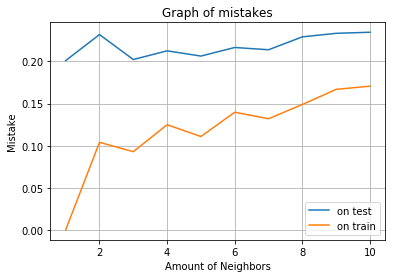

In [4]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
print(len(x_data))
x = list([])
y_train = list([])
y_test = list([])
for k in range(1, 10 + 1):
    k_neigh = KNeighborsClassifier(n_neighbors=k)
    cv = cross_validate(k_neigh, x_data, y_data, cv=10, return_train_score=True)
    x.append(k)
    y_train.append(1 - np.array(cv['train_score']).mean())
    y_test.append(1 - np.array(cv['test_score']).mean())

# plt.xlim([1, 10])
# plt.ylim([0.1, 0.2])
plt.title('Graph of mistakes')
plt.plot(x, y_test, label='on test')
plt.plot(x, y_train, label='on train')
plt.ylabel('Mistake')
plt.xlabel('Amount of Neighbors')
plt.legend(loc=4, frameon=True)
plt.grid()
plt.show()

In [5]:
print('Самая маленькая ошибка на тестовой части при k =', y_test.index(min(y_test)) + 1)

Самая маленькая ошибка на тестовой части при k = 1


In [6]:
# примените метод SVM
# http://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html
# нарисовать график зависимости ошибки перекрестной проверки на тестовой части от регуляризации C (log масштаб перебора по C). 
# Сделать вывод об оптимальном C.
# Что означают и как влияют параметры multi_class, fit_intercept, intercept_scaling, class_weight, random_state?
# Нарисуйте график зависимости числа опорных векторов как функцию от C

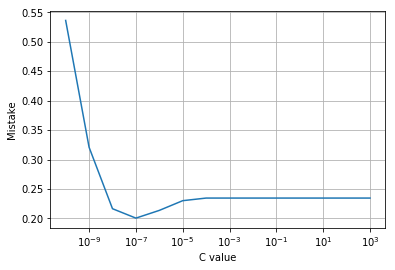

Минимальная ошибка 0.200509191894, при c = 1e-07


In [7]:
from sklearn.svm import LinearSVC

y = list([])
for c in range(-10,4):
    svc = LinearSVC(C=10**c)
    scores = cross_val_score(estimator=svc, X=x_data, y=y_data, cv=10)
    y.append(1 - scores.mean())
    
x = list([10**i for i in range(-10, 4)])
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
line = ax.plot(x, y)
ax.set_xscale('log')
plt.ylabel('Mistake')
plt.xlabel('C value')
plt.grid()
plt.show()

print('Минимальная ошибка ', min(y),', при c = ', x[y.index(min(y))], sep='')

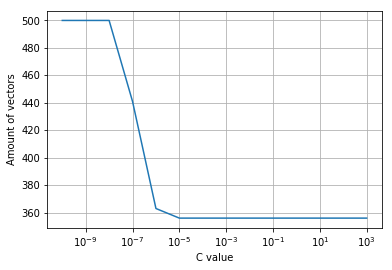

In [8]:
from sklearn.svm import SVC
y = list([])
x = list([])
for c in range(-10,4):
    clf = SVC(kernel='linear', C=10**c).fit(x_data, y_data)
    y.append(clf.support_vectors_.shape[0])
    x.append(10**c)
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
line = ax.plot(x, y)
ax.set_xscale('log')
plt.ylabel('Amount of vectors')
plt.xlabel('C value')
plt.grid()
plt.show()

In [9]:
# примените метод DT
# http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
# Как влияют и что означают параметры max_depth, min_samples_split, min_samples_leaf, criteria на качество классификатора?
# Выбрать наилучшие значения параметров по вашим экспериментам

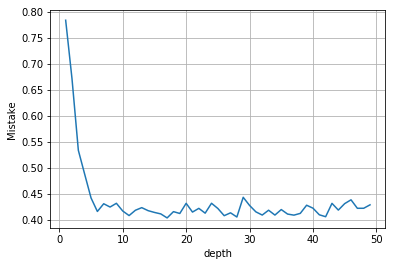

Минимальная ошибка 0.403975166652, при max_depth = 17


In [10]:
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.model_selection import cross_val_score

y = list([])
x = list([])
for i in range(1, 50):
    clf = DTC(max_depth=i)
    scores = cross_val_score(estimator=clf, X=x_data, y=y_data, cv=10)
    y.append(1 - scores.mean())
    x.append(i)
    

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
line = ax.plot(x, y)
plt.ylabel('Mistake')
plt.xlabel('depth')
plt.grid()
plt.show()

print('Минимальная ошибка ', min(y),', при max_depth = ', x[y.index(min(y))], sep='')

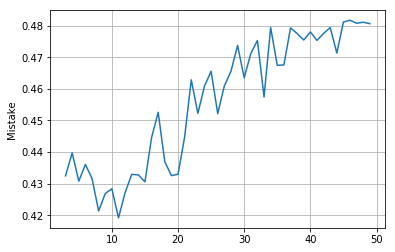

Минимальная ошибка 0.419135818249, при min_samples_split = 11


In [17]:
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.model_selection import cross_val_score

y = list([])
x = list([])
for i in range(3, 50):
    clf = DTC(min_samples_split=i)
    scores = cross_val_score(estimator=clf, X=x_data, y=y_data, cv=10)
    y.append(1 - scores.mean())
    x.append(i)
    

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
line = ax.plot(x, y)
plt.ylabel('Mistake')
plt.grid()
plt.show()

print('Минимальная ошибка ', min(y),', при min_samples_split = ', x[y.index(min(y))], sep='')

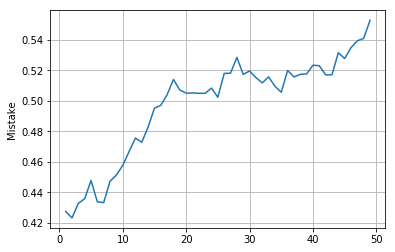

Минимальная ошибка 0.423250148506, при min_samples_leaf = 2


In [18]:
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.model_selection import cross_val_score

y = list([])
x = list([])
for i in range(1, 50):
    clf = DTC(min_samples_leaf=i)
    scores = cross_val_score(estimator=clf, X=x_data, y=y_data, cv=10)
    y.append(1 - scores.mean())
    x.append(i)
    

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
line = ax.plot(x, y)
plt.ylabel('Mistake')
plt.grid()
plt.show()

print('Минимальная ошибка ', min(y),', при min_samples_leaf = ', x[y.index(min(y))], sep='')

In [11]:
# примените метод NN
# http://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html
# Как влияет параметр hidden_layer_sizes на качество классификации?
# Выбрать наилучшее значение параметра по вашим экспериментам
# (***) воспользуйтесь NN из theano (http://deeplearning.net/software/theano/tutorial/ и http://deeplearning.net/tutorial/

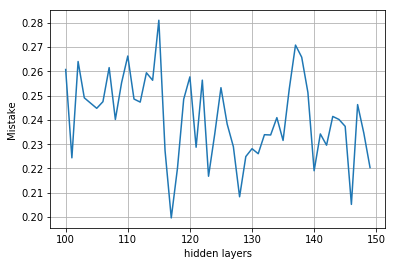

Минимальная ошибка 0.199614883486, при hidden layeds = 117


In [12]:
from sklearn.neural_network import MLPClassifier as MLP

y = list([])
x = list([])
for i in range(100, 150):
    clf = MLP(hidden_layer_sizes=(i,))
    scores = cross_val_score(estimator=clf, X=x_data, y=y_data, cv=10)
    y.append(1 - scores.mean())
    x.append(i)


fig = plt.figure()
plt.plot(x, y)
plt.ylabel('Mistake')
plt.xlabel('hidden layers')
plt.grid()
plt.show()

print('Минимальная ошибка ', min(y),', при hidden layeds = ', x[y.index(min(y))], sep='')

## Сделайте вывод о наилучшем методе и его оптимальных параметрах

In [13]:
# (*) Обучите наилучший метод с оптимальными параметрами на полной выборке, 
# примените к тестовой выборке соревнования и загрузите результат на kaggle

Самая маленькая ошибка наблюдается на MLP. Причем при увеличении слоев ошибка все меньше и меньше(я дальше не проверял, так как очень долго)